In [1]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()
tf.set_random_seed(0)
np.random.seed(0)

In [2]:
lr = 1e-2
epoch = int(1e3)
la = 1e-5

In [3]:
x_data = np.linspace(-1,1).astype(np.float32).reshape((-1,1)) 
y_data = (1.+2.*x_data+0.7*np.random.normal(size=x_data.shape)).astype(np.float32) 

In [4]:
x = tf.placeholder(tf.float32, (None,1)) 
y = tf.placeholder(tf.float32, (None,1)) 

alpha = tf.get_variable('alpha', (), tf.float32, tf.keras.initializers.constant(0.0))
beta = tf.get_variable('beta', (1,1), tf.float32, tf.keras.initializers.RandomNormal())

y_pred = alpha + x @ beta 
recon_loss = tf.nn.l2_loss(y-y_pred) 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
loss_w = [tf.abs(var)
          for var in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)
          if "beta" in var.name]
reg_loss = la * tf.add_n(loss_w)

In [6]:
loss = tf.reduce_mean(recon_loss + reg_loss)
train = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

In [7]:
with tf.Session() as sess:
    
    tf.global_variables_initializer().run()
    
    alpha_trace = []
    beta_trace = []
    loss_trace = []
    
    feed_dict = {x:x_data, y:y_data}
    for i in range(epoch):
        if i == 0:
            alpha_run, beta_run, loss_run = sess.run([alpha, beta, loss], feed_dict=feed_dict)
        else:
            alpha_run, beta_run, loss_run, _ = sess.run([alpha, beta, loss, train], feed_dict=feed_dict)
        alpha_trace.append(alpha_run)
        beta_trace.append(beta_run[0,0])
        loss_trace.append(loss_run)   
    y_pred_run = sess.run(y_pred, feed_dict=feed_dict)

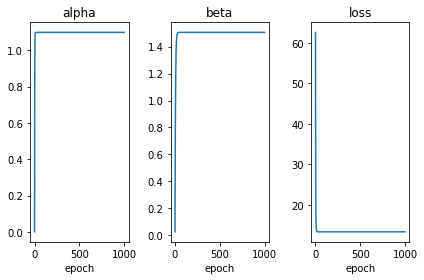

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(alpha_trace)
ax1.set_xlabel('epoch')
ax1.set_title('alpha')
ax2.plot(beta_trace)
ax2.set_xlabel('epoch')
ax2.set_title('beta')
ax3.plot(loss_trace)
ax3.set_xlabel('epoch')
ax3.set_title('loss')
plt.tight_layout()
plt.show()

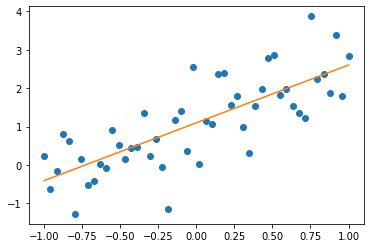

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(x_data.reshape((-1,)), y_data.reshape((-1,)), 'o')
ax.plot(x_data.reshape((-1,)), y_pred_run.reshape((-1,)))
plt.show()